# Translate image to corresponding alphabhet using pre-trained model

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
%matplotlib inline



Using TensorFlow backend.


In [18]:
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
LABELS = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
LABELS.append("nothing")
LABELS.append("space")

MODEL_PATH = "trained_model\my_model.h5"

In [12]:
from keras.models import load_model
model = load_model(MODEL_PATH)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 50)        500       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 100)       45100     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 100)       90100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 100)       0         
__________

Y


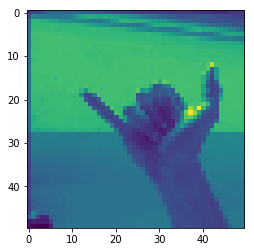

In [26]:
IMG_PATH = "confirm/Y_test.jpg"
def which_letter(IMG_PATH):
    img_array = cv2.imread(IMG_PATH)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    new_img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(new_img_array)
    new_img_array = new_img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)
    list_of_images = np.expand_dims(new_img_array, axis = 0)
    results = model.predict(list_of_images)
    single_result = results[0]
    most_likely_class_index = int(np.argmax(single_result))
    class_likely_hood = single_result[most_likely_class_index]
    return LABELS[most_likely_class_index]
print(which_letter(IMG_PATH))